## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium
from folium import Icon

## Load the datasets

In [2]:
king_county_df =  pd.read_csv("data/king_county_cleaned_data.csv", low_memory=False, dtype={"Violation Code": "object"})

## Convert Inspection Date column to datetime

In [3]:
king_county_df["Inspection Date"] = pd.to_datetime(king_county_df["Inspection Date"])

## King County map

In [4]:
not_null = king_county_df[~(king_county_df['Longitude'].isnull()) & ~(king_county_df['Grade'].isnull())]

In [5]:
not_null['Grade'].unique()

array([1., 2., 3., 4.])

In [6]:
not_null['Grade Color'] = not_null['Grade'].map({1: 'red', 2: 'blue', 3: 'green', 4: 'purple'})

/tmp/ipykernel_22435/253855138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_null['Grade Color'] = not_null['Grade'].map({1: 'red', 2: 'blue', 3: 'green', 4: 'purple'})


In [7]:
not_null

,Inspection Date,City,Longitude,Latitude,Inspection Business Name,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Grade,Seating,Risk,Violation Code,Grade Color
0,2023-03-02,seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,20.0,Unsatisfactory,0.0,RED,Food contact surfaces and utensils used for ra...,15,PR0089260,DAJ5DTHLV,1.0,Seating 0-12,Risk Category III,1300,red
1,2023-03-02,seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,20.0,Unsatisfactory,0.0,RED,Proper cold holding temperatures ( 42 degrees ...,5,PR0089260,DAJ5DTHLV,1.0,Seating 0-12,Risk Category III,2120,red
2,2022-08-31,seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,10.0,Unsatisfactory,0.0,BLUE,"Insects, rodents, animals not present; entranc...",5,PR0089260,DAEEWQC0L,1.0,Seating 0-12,Risk Category III,3200,red
3,2022-08-31,seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,10.0,Unsatisfactory,0.0,RED,Food Worker Cards current for all food workers...,5,PR0089260,DAEEWQC0L,1.0,Seating 0-12,Risk Category III,0200,red
4,2022-01-13,seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,0.0,Satisfactory,0.0,NaN,NaN,0,PR0089260,DAWWGK08K,1.0,Seating 0-12,Risk Category III,NaN,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255208,2017-11-27,seattle,-122.312056,47.715359,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,Routine Inspection/Field Review,0.0,Satisfactory,0.0,NaN,NaN,0,PR0086991,DA3OGNCPY,2.0,Seating 0-12,Risk Category III,NaN,blue
255209,2017-09-06,seattle,-122.312056,47.715359,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,Consultation/Education - Field,0.0,Complete,0.0,NaN,NaN,0,PR0086991,DALIX7JOT,2.0,Seating 0-12,Risk Category III,NaN,blue
255210,2023-01-23,kent,-122.220420,47.438930,ZZ DESSERT,Routine Inspection/Field Review,10.0,Satisfactory,0.0,BLUE,"Wiping cloths properly used, stored, proper sa...",5,PR0089412,DAQZ5Q076,1.0,Seating 0-12,Risk Category III,3400,red
255211,2023-01-23,kent,-122.220420,47.438930,ZZ DESSERT,Routine Inspection/Field Review,10.0,Satisfactory,0.0,BLUE,"Plumbing properly sized, installed,...",5,PR0089412,DAQZ5Q076,1.0,Seating 0-12,Risk Category III,4400,red


In [8]:
new_gp = not_null.groupby('City')[['City','Inspection Date','Latitude','Longitude','Grade Color']].head()

In [9]:
new_gp['Inspection Date'].nunique()

187

In [10]:
new_gp.head(30)

,City,Inspection Date,Latitude,Longitude,Grade Color
0,seattle,2023-03-02,47.662311,-122.296415,red
1,seattle,2023-03-02,47.662311,-122.296415,red
2,seattle,2022-08-31,47.662311,-122.296415,red
3,seattle,2022-08-31,47.662311,-122.296415,red
4,seattle,2022-01-13,47.662311,-122.296415,red
48,redmond,2023-02-10,47.687230,-122.133729,red
49,redmond,2022-06-03,47.687230,-122.133729,red
50,redmond,2022-04-29,47.687230,-122.133729,red
51,redmond,2021-12-09,47.687230,-122.133729,red
52,kent,2023-02-16,47.439923,-122.219347,green


In [11]:
new_gp['City'].unique()

array(['seattle', 'redmond', 'kent', 'kenmore', 'issaquah', 'bellevue',
       'woodinville', 'kirkland', 'renton', 'des moines', 'burien',
       'auburn', 'bothell', 'federal way', 'tukwila', 'enumclaw',
       'shoreline', 'black diamond', 'snoqualmie', 'lake forest park',
       'covington', 'maple valley', 'sammamish', 'mercer island',
       'north bend', 'duvall', 'newcastle', 'seatac', 'vashon', 'pacific',
       'normandy park', 'fall city', 'carnation', 'clyde hill',
       'snohomish', 'snoqualmie pass', 'algona', 'bellingham',
       'skykomish', 'tacoma', 'lynnwood', 'puyallup', 'everett', 'hobart',
       'medina', 'ravensdale', 'west seattle', 'mount vernon', 'preston',
       'mukilteo', 'baring', 'monroe'], dtype=object)

In [12]:
new_gp2 = not_null.groupby('Inspection Date')[['Inspection Date','City','Latitude','Longitude','Grade Color']].head()
new_gp2 = new_gp2[pd.notnull(new_gp2['Inspection Date'])]

In [13]:
new_gp2['City'].unique()

array(['seattle', 'redmond', 'kent', 'kenmore', 'issaquah', 'bellevue',
       'woodinville', 'kirkland', 'renton', 'des moines', 'burien',
       'auburn', 'bothell', 'federal way', 'tukwila', 'enumclaw',
       'shoreline', 'snoqualmie', 'lake forest park', 'covington',
       'maple valley', 'sammamish', 'mercer island', 'north bend',
       'duvall', 'newcastle', 'seatac', 'vashon', 'pacific',
       'normandy park', 'fall city', 'clyde hill', 'snoqualmie pass',
       'snohomish', 'black diamond', 'carnation', 'bellingham',
       'skykomish', 'algona', 'tacoma', 'lynnwood', 'puyallup',
       'ravensdale', 'medina', 'preston', 'mukilteo'], dtype=object)

In [14]:
dates_gp = new_gp2['Inspection Date'].nunique()
dates_gp

5205

In [15]:
new_gp2

,Inspection Date,City,Latitude,Longitude,Grade Color
0,2023-03-02,seattle,47.662311,-122.296415,red
1,2023-03-02,seattle,47.662311,-122.296415,red
2,2022-08-31,seattle,47.662311,-122.296415,red
3,2022-08-31,seattle,47.662311,-122.296415,red
4,2022-01-13,seattle,47.662311,-122.296415,red
...,...,...,...,...,...
254740,2008-12-22,seattle,47.672679,-122.354013,red
254759,2008-01-12,kirkland,47.676207,-122.206074,red
254760,2008-01-12,kirkland,47.676207,-122.206074,red
255024,2015-05-03,seattle,47.507443,-122.355639,red


In [16]:
date = '2006-01-04'
city_gp = new_gp2.loc[new_gp2['Inspection Date']==date] 
display(city_gp)


,Inspection Date,City,Latitude,Longitude,Grade Color
16408,2006-01-04,seattle,47.613945,-122.322290,blue
16409,2006-01-04,seattle,47.613945,-122.322290,blue
16410,2006-01-04,seattle,47.613945,-122.322290,blue
53696,2006-01-04,seattle,47.624475,-122.321183,red
70901,2006-01-04,seattle,47.663557,-122.297460,red


In [17]:
date = '2023-09-10'
city_gp = new_gp2.loc[new_gp2['Inspection Date']==date] 
display(city_gp)

,Inspection Date,City,Latitude,Longitude,Grade Color
55171,2023-09-10,seattle,47.592050,-122.333030,red
115844,2023-09-10,seattle,47.595438,-122.331593,red
115845,2023-09-10,seattle,47.595438,-122.331593,red
115846,2023-09-10,seattle,47.595438,-122.331593,red
115847,2023-09-10,seattle,47.595438,-122.331593,red


In [18]:
date = '2006-01-03'
city_gp = new_gp2.loc[new_gp2['Inspection Date']==date] 
display(city_gp)

,Inspection Date,City,Latitude,Longitude,Grade Color
95336,2006-01-03,burien,47.470324,-122.334394,red
119036,2006-01-03,seattle,47.624425,-122.318337,red
141596,2006-01-03,bellevue,47.615258,-122.205058,red
141597,2006-01-03,bellevue,47.615258,-122.205058,red
168026,2006-01-03,seattle,47.733345,-122.310499,red


In [19]:
new_gp2.loc[6]['Grade Color']

'blue'

In [20]:
len(new_gp2)

24396

In [21]:
new_gp2['Inspection Date'].unique()

<DatetimeArray>
['2023-03-02 00:00:00', '2022-08-31 00:00:00', '2022-01-13 00:00:00',
 '2021-01-06 00:00:00', '2023-06-22 00:00:00', '2023-03-01 00:00:00',
 '2022-07-13 00:00:00', '2022-06-29 00:00:00', '2021-12-29 00:00:00',
 '2020-07-29 00:00:00',
 ...
 '2006-10-28 00:00:00', '2020-09-03 00:00:00', '2010-02-20 00:00:00',
 '2008-09-20 00:00:00', '2013-01-27 00:00:00', '2021-09-12 00:00:00',
 '2011-09-17 00:00:00', '2013-05-25 00:00:00', '2007-12-29 00:00:00',
 '2022-09-05 00:00:00']
Length: 5205, dtype: datetime64[ns]

In [22]:
def map_date(date,df):
    king_map = folium.Map(location=[47.5480,-121.9836] , zoom_start=8)
    city_gp = df.loc[df['Inspection Date']==date] 
    display(city_gp)
    for i in range(0,len(city_gp)):
        clr = city_gp.iloc[i]['Grade Color']
        folium.Marker(location=[city_gp.iloc[i]['Latitude'], city_gp.iloc[i]['Longitude']],icon=Icon(color=clr)).add_to(king_map)
    display(king_map)

In [23]:
map_date('2023-09-07',new_gp2)

,Inspection Date,City,Latitude,Longitude,Grade Color
1395,2023-09-07,kent,47.416203,-122.197490,blue
13842,2023-09-07,seattle,47.561713,-122.377768,red
15824,2023-09-07,seattle,47.431525,-122.317979,green
23626,2023-09-07,bellevue,47.610303,-122.143511,red
31866,2023-09-07,seattle,47.587050,-122.333640,red


## Inspection Closed Business

In [24]:
closed_business = king_county_df[king_county_df["Inspection Closed Business"] == 1]

In [25]:
pd.DataFrame(closed_business[["Violation Code", "Violation Description", "Violation Points", "Violation Type"]].value_counts())

,,,,count
Violation Code,Violation Description,Violation Points,Violation Type,
0600,Adequate handwashing facilities,10,RED,76
0400,Hands washed as required,25,RED,51
2110,Proper cold holding temperatures (greater than 45 degrees F),10,RED,43
1600,Proper cooling procedure,25,RED,37
1900,No room temperature storage; proper use of time as a control,25,RED,36
0100,"PIC certified by accredited program or compliance with code, or correct answers",5,RED,31
1400,Raw meats below and away from ready to eat food; species separated,5,RED,28
3300,"Potential food contamination prevented during delivery, preparation, storage, display",5,BLUE,26
3400,"Wiping cloths properly used, stored, proper sanitizer",5,BLUE,25


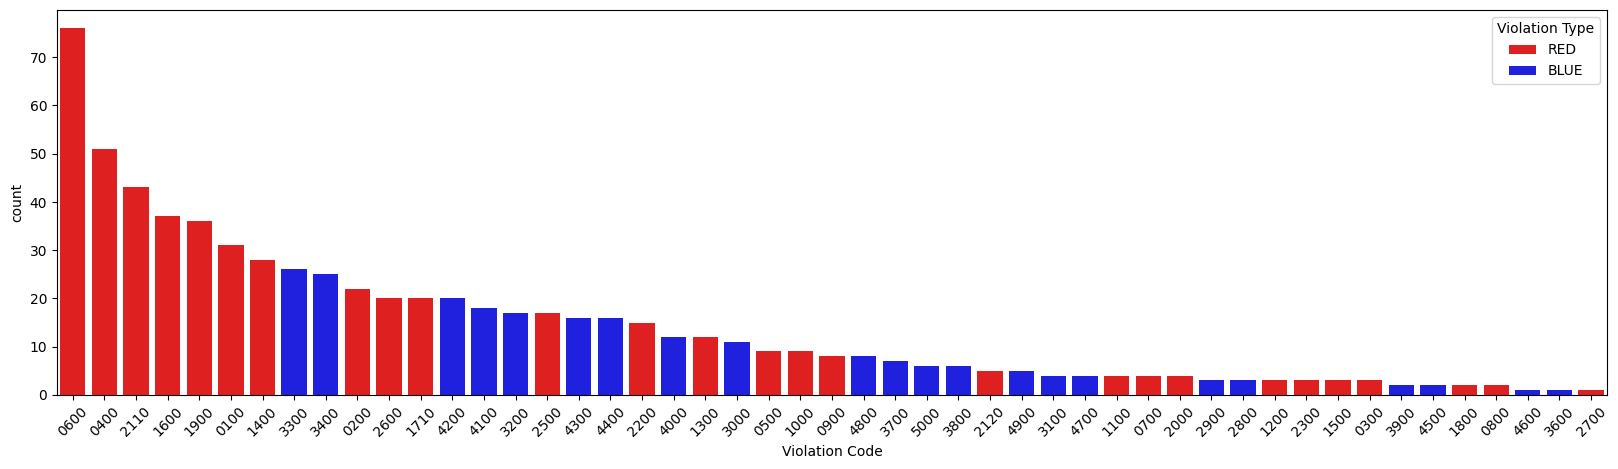

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(data=closed_business, x="Violation Code", hue="Violation Type", palette=["red", "blue"], dodge=False, order=closed_business["Violation Code"].value_counts().index)
plt.rcParams.update({'font.size': 7})
plt.xticks(rotation=45)
plt.show()

In [27]:
red_violations = closed_business[closed_business["Violation Type"] == "RED"]
blue_violations = closed_business[closed_business["Violation Type"] == "BLUE"]

In [28]:
red_violations = pd.DataFrame(red_violations[["Violation Code", "Violation Description", "Violation Points", "Violation Type"]].value_counts().head(10))
blue_violations = pd.DataFrame(blue_violations[["Violation Code", "Violation Description", "Violation Points", "Violation Type"]].value_counts().head(10))

In [29]:
red_violations

,,,,count
Violation Code,Violation Description,Violation Points,Violation Type,
0600,Adequate handwashing facilities,10,RED,76
0400,Hands washed as required,25,RED,51
2110,Proper cold holding temperatures (greater than 45 degrees F),10,RED,43
1600,Proper cooling procedure,25,RED,37
1900,No room temperature storage; proper use of time as a control,25,RED,36
0100,"PIC certified by accredited program or compliance with code, or correct answers",5,RED,31
1400,Raw meats below and away from ready to eat food; species separated,5,RED,28
0200,"Food Worker Cards current for all food workers, new food workers trained",5,RED,22
1710,Proper hot holding temperatures (less than 130 degrees F),25,RED,20


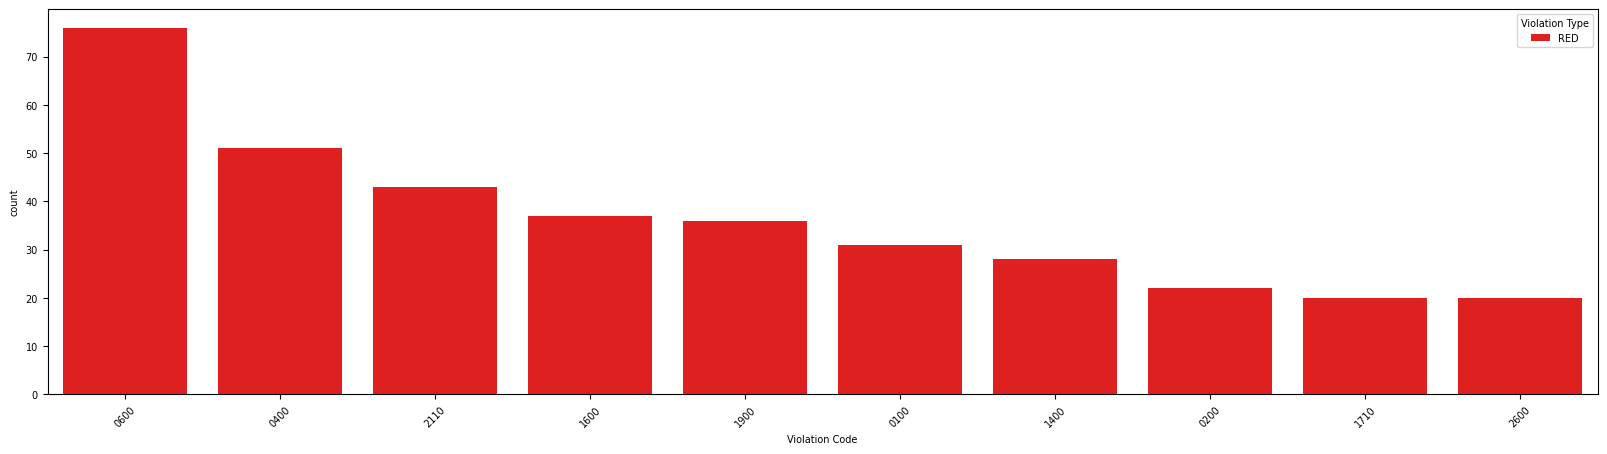

In [30]:
plt.figure(figsize=(20,5))
sns.barplot(data=red_violations, x="Violation Code", y="count", hue="Violation Type", palette=["red"])
plt.rcParams.update({'font.size': 7})
plt.xticks(rotation=45)
plt.show()

In [31]:
blue_violations

,,,,count
Violation Code,Violation Description,Violation Points,Violation Type,
3300,"Potential food contamination prevented during delivery, preparation, storage, display",5,BLUE,26
3400,"Wiping cloths properly used, stored, proper sanitizer",5,BLUE,25
4200,"Food contact surfaces maintained, clean, sanitized",5,BLUE,20
4100,"Warewashing facilities properly installed, maintained, used",5,BLUE,18
3200,"Insects, rodents, animals not present; entrance controlled",5,BLUE,17
4400,"Plumbing properly sized, installed,...",5,BLUE,16
4300,Non food contact surfaces maintained and clean,3,BLUE,16
4000,Food and non food surfaces properly used and constructed; cleanable,5,BLUE,12
3000,Proper thawing methods used,3,BLUE,11


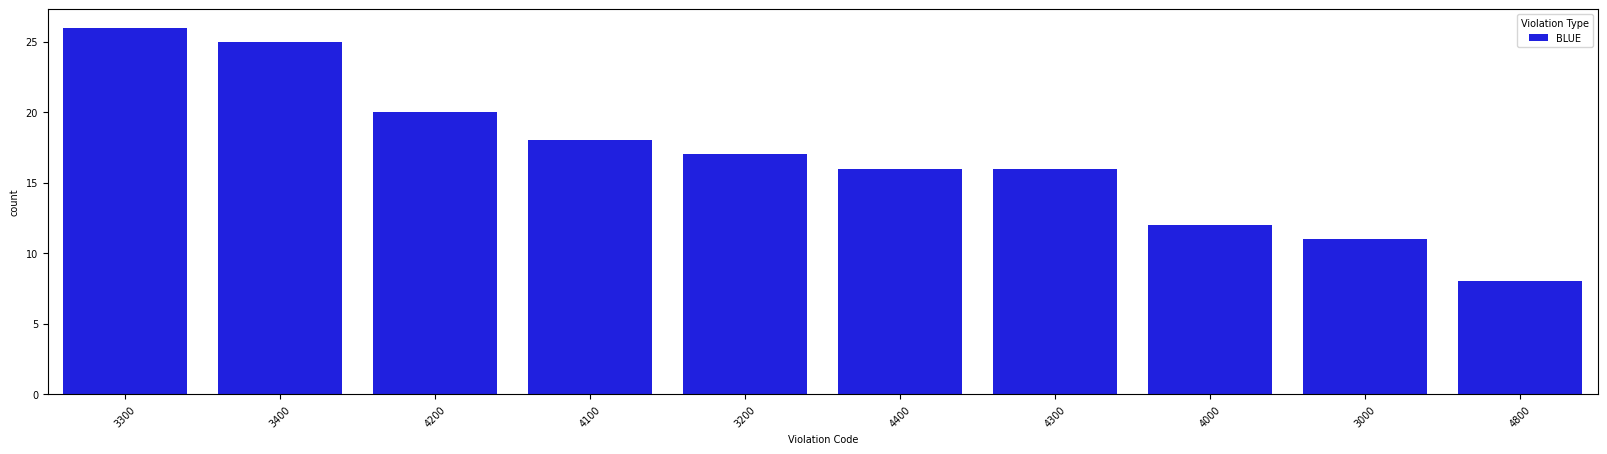

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(data=blue_violations, x="Violation Code", y="count", hue="Violation Type", palette=["blue"])
plt.rcParams.update({'font.size': 7})
plt.xticks(rotation=45)
plt.show()

## Bar plots for number of Inspections and Closed business

In [33]:
from datetime import datetime

In [34]:
#pd.set_option('display.max_columns', None) this line will show all of the columns

In [35]:
newking = king_county_df.sort_values('Inspection Date')
newking = newking[~(newking['Inspection Date'].isnull())]
newking

,Inspection Date,City,Longitude,Latitude,Inspection Business Name,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Grade,Seating,Risk,Violation Code
148117,2006-01-02,seattle,-122.342825,47.655520,PAGLIACCI PIZZA INC,Consultation/Education - Field,0.0,Complete,0.0,NaN,NaN,0,PR0029654,DA1615953,1.0,Seating 13-50,Risk Category III,NaN
178913,2006-01-03,seattle,-122.284611,47.707075,ROGERS ELEMENTARY SCHOOL,Routine Inspection/Field Review,5.0,Satisfactory,0.0,BLUE,NaN,5,PR0001835,DA1455560,1.0,School Lunch Program,Risk Category II,NaN
141597,2006-01-03,bellevue,-122.205058,47.615258,NORDSTROM,Routine Inspection/Field Review,15.0,Unsatisfactory,0.0,RED,NaN,10,PR0040235,DA1455758,1.0,Seating 0-12,Risk Category III,NaN
172672,2006-01-03,seattle,-122.270651,47.536795,RAINIER VALERO,Routine Inspection/Field Review,17.0,Unsatisfactory,0.0,BLUE,NaN,2,PR0051197,DA1455040,1.0,Seating 0-12,Risk Category III,NaN
172673,2006-01-03,seattle,-122.270651,47.536795,RAINIER VALERO,Routine Inspection/Field Review,17.0,Unsatisfactory,0.0,BLUE,NaN,5,PR0051197,DA1455040,1.0,Seating 0-12,Risk Category III,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115862,2023-09-10,seattle,-122.331593,47.595438,LEVY RESTAURANTS @ LUMEN FIELD,Routine Inspection/Field Review,10.0,Unsatisfactory,0.0,RED,Adequate handwashing facilities,10,PR0067614,DABUYPKVM,1.0,Seating 0-12,Risk Category III,0600
143372,2023-09-10,seattle,NaN,NaN,"OBSERV, INC",Routine Inspection/Field Review,0.0,Satisfactory,0.0,NaN,NaN,0,PR0091247,DATCL0PIX,1.0,Mobile Food Unit,Risk Category II,NaN
143370,2023-09-10,seattle,NaN,NaN,"OBSERV, INC",Routine Inspection/Field Review,0.0,Satisfactory,0.0,NaN,NaN,0,PR0091245,DAEQXVA8I,1.0,Mobile Food Unit,Risk Category II,NaN
115861,2023-09-10,seattle,-122.331593,47.595438,LEVY RESTAURANTS @ LUMEN FIELD,Routine Inspection/Field Review,15.0,Unsatisfactory,0.0,RED,Compliance with valid permit; operating and ri...,10,PR0067606,DA6GSHZ1W,2.0,Seating > 250,Risk Category III,2600


In [36]:
resampled_dates = newking.loc[:,['Inspection Date','Inspection Closed Business']].copy()
resampled_dates

,Inspection Date,Inspection Closed Business
148117,2006-01-02,0.0
178913,2006-01-03,0.0
141597,2006-01-03,0.0
172672,2006-01-03,0.0
172673,2006-01-03,0.0
...,...,...
115862,2023-09-10,0.0
143372,2023-09-10,0.0
143370,2023-09-10,0.0
115861,2023-09-10,0.0


In [37]:
resampled_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254541 entries, 148117 to 143371
Data columns (total 2 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Inspection Date             254541 non-null  datetime64[ns]
 1   Inspection Closed Business  254541 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 MB


###### resample every 6M

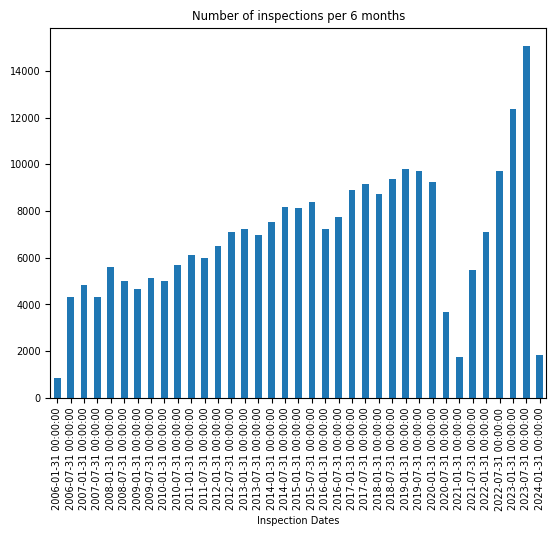

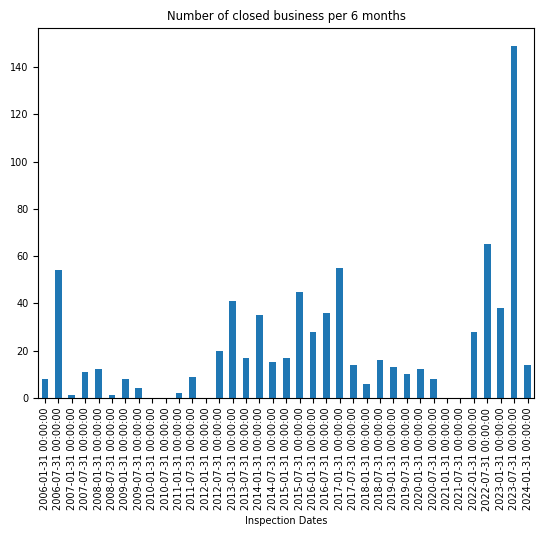

In [38]:
resample_6M = resampled_dates.set_index('Inspection Date').resample('6M')['Inspection Closed Business'].agg(['count', 'sum'])
plt.figure()

ax1 = resample_6M['count'].plot(kind='bar')
ax1.set_title('Number of inspections per 6 months')
ax1.set_xlabel('Inspection Dates')

plt.figure()
ax2 = resample_6M['sum'].plot(kind='bar')
ax2.set_title('Number of closed business per 6 months')
ax2.set_xlabel('Inspection Dates')

plt.show()

###### resample every year

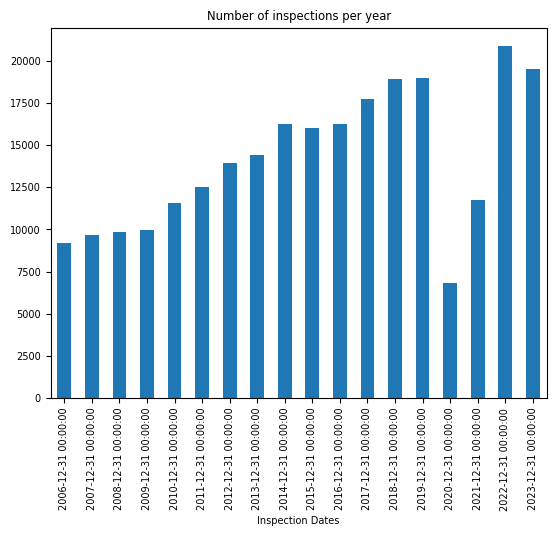

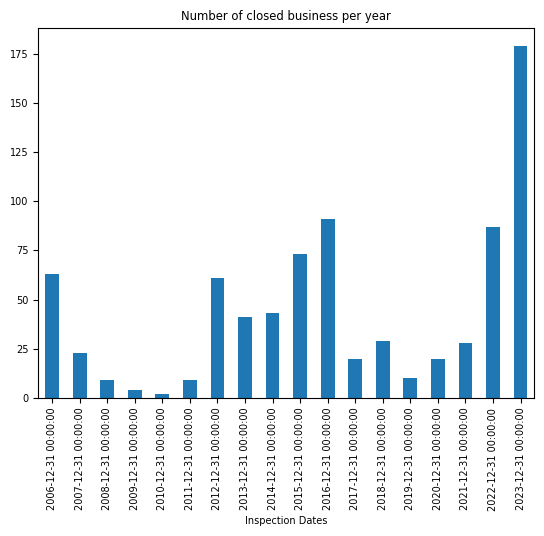

In [39]:
resample_Y = resampled_dates.set_index('Inspection Date').resample('Y')['Inspection Closed Business'].agg(['count', 'sum'])
plt.figure()

ax1 = resample_Y['count'].plot(kind='bar')
ax1.set_title('Number of inspections per year')
ax1.set_xlabel('Inspection Dates')

plt.figure()
ax2 = resample_Y['sum'].plot(kind='bar')
ax2.set_title('Number of closed business per year')
ax2.set_xlabel('Inspection Dates')

plt.show()

## Restaurants with the highest number of inspections

In [40]:
table = king_county_df.groupby("Business_ID").agg({"City": "first", "Grade": "first", "Seating": "first", "Risk": "first", "Inspection Date": "nunique"}).sort_values("Inspection Date", ascending=False)
table.columns = ["City", "Grade", "Seating", "Risk", "Number of Inspections"]
table

,City,Grade,Seating,Risk,Number of Inspections
Business_ID,,,,,
PR0070218,seattle,1.0,Seating 0-12,Risk Category III,76
PR0012643,seattle,2.0,Seating 0-12,Risk Category III,72
PR0054525,seattle,2.0,Seating 0-12,Risk Category III,68
PR0003071,seattle,2.0,Seating 51-150,Risk Category III,60
PR0003213,seattle,2.0,Seating 51-150,Risk Category III,60
...,...,...,...,...,...
PR0089494,tacoma,NaN,Mobile Food Unit,Risk Category I,0
PR0042088,enumclaw,NaN,Seating 0-12,Risk Category II,0
PR0089525,tukwila,NaN,Seating 13-50,Risk Category III,0


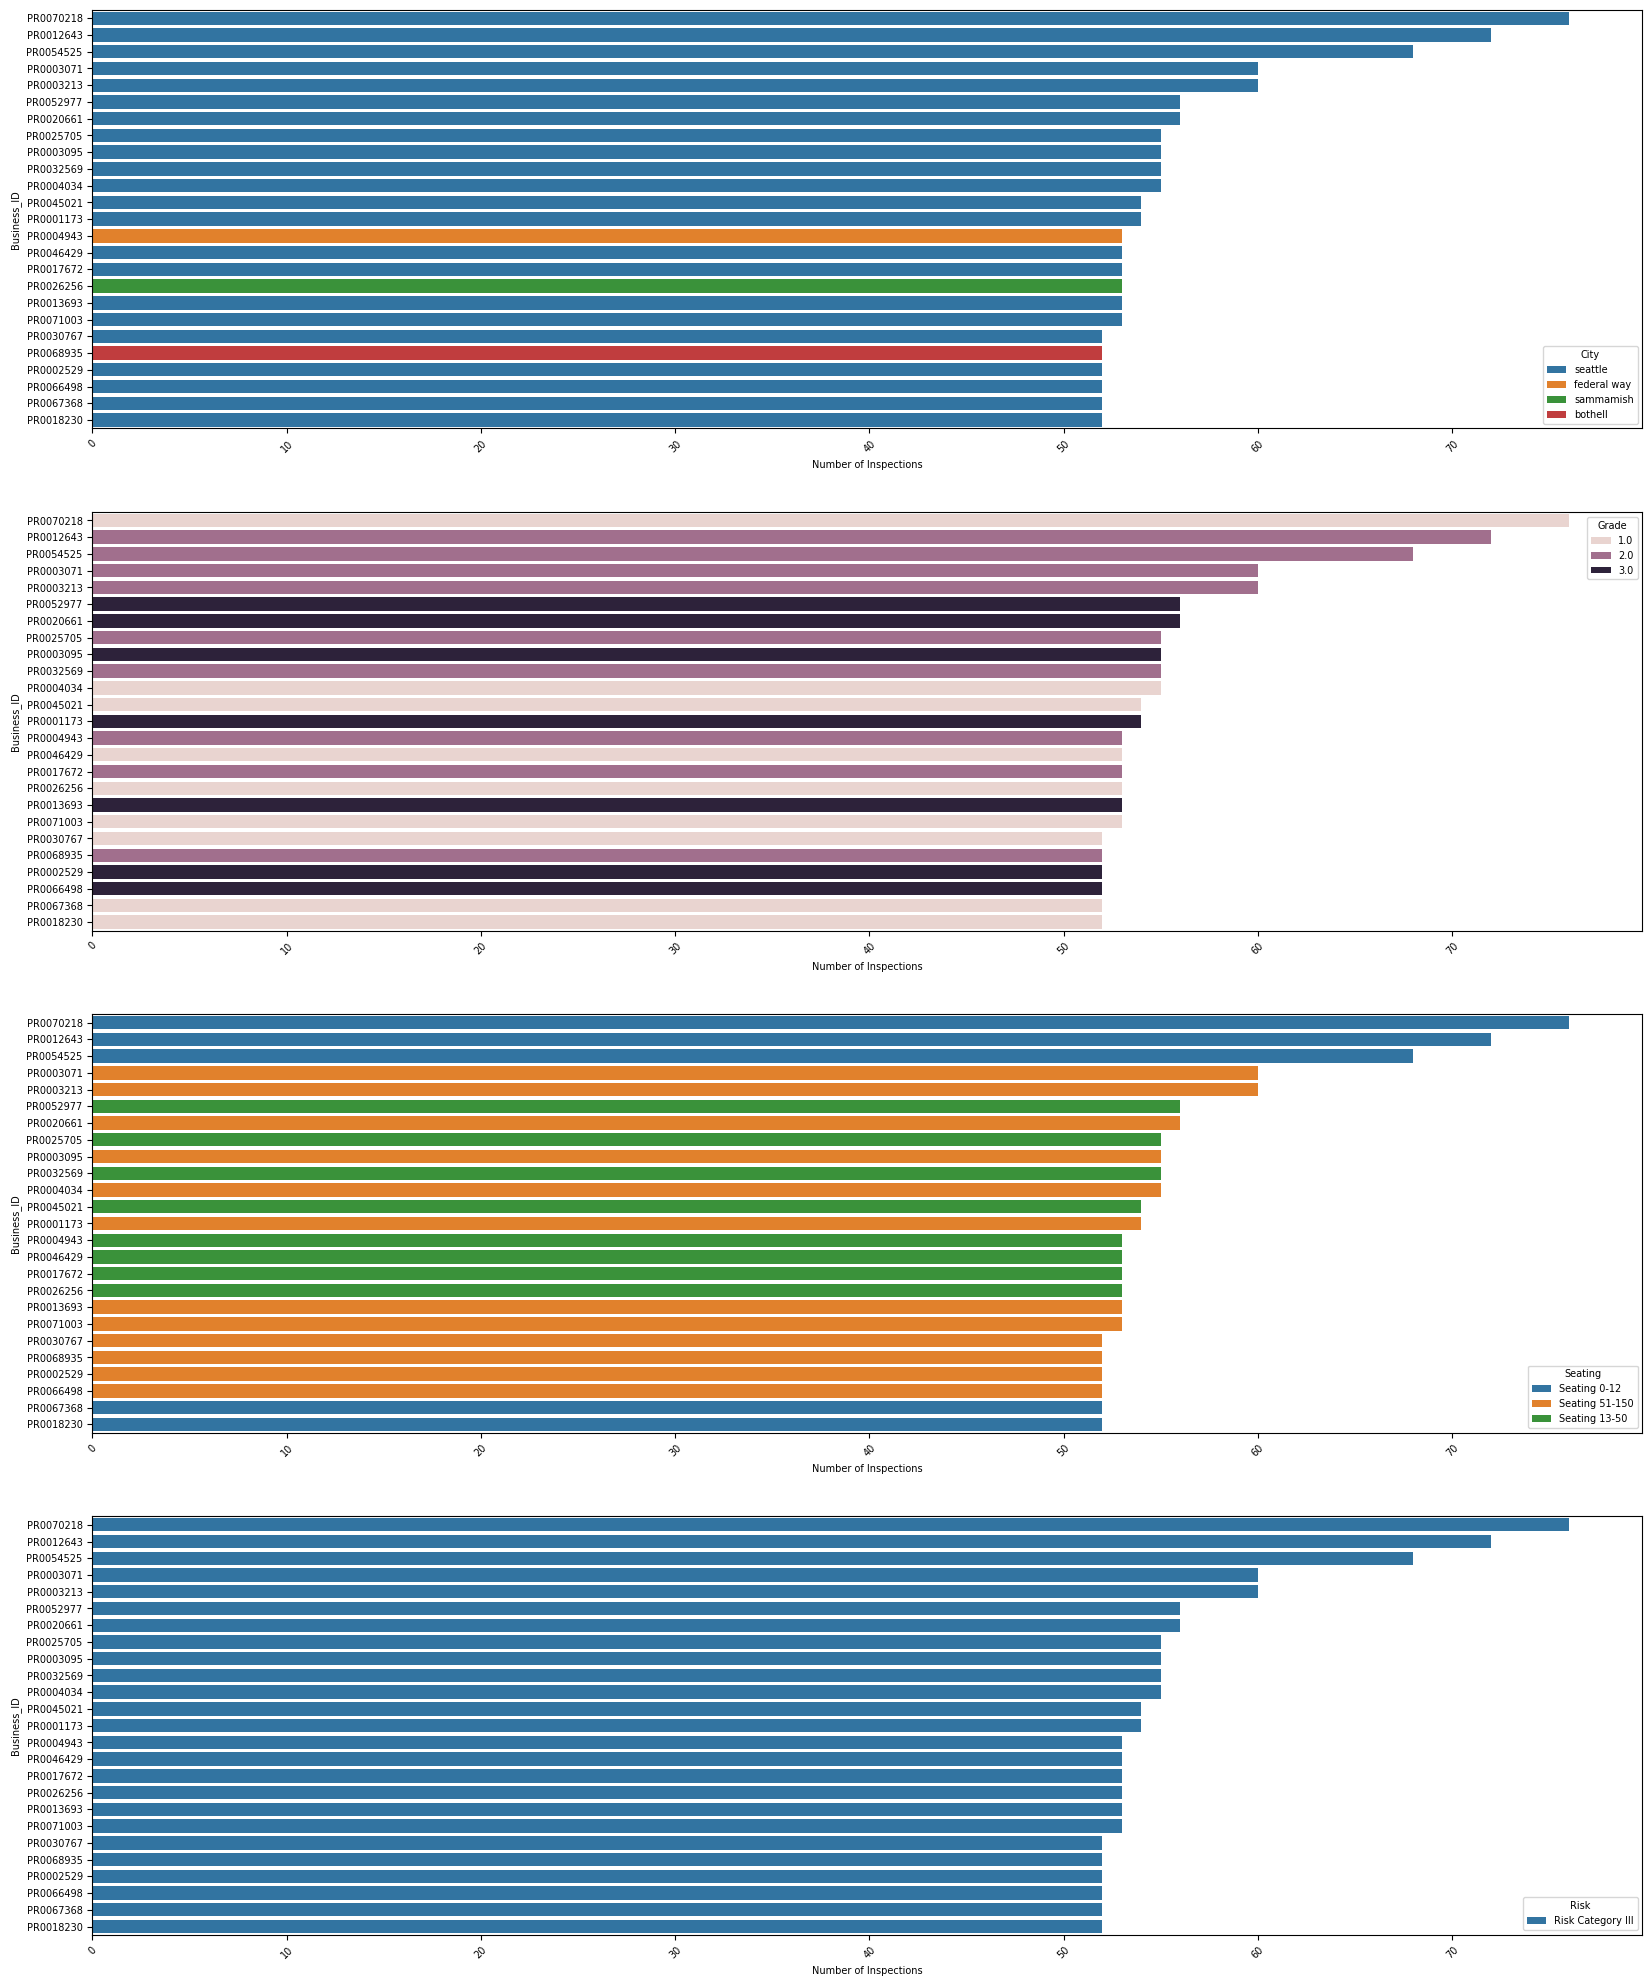

In [41]:
t=table.head(25)
plt.figure(figsize=(20,25))

plt.subplot(411)
sns.barplot(data=t, x="Number of Inspections", y=t.index, hue="City", dodge=False, orient="h")
plt.xticks(rotation=45)

plt.subplot(412)
sns.barplot(data=t, x="Number of Inspections", y=t.index, hue="Grade", dodge=False, orient="h")
plt.xticks(rotation=45)

plt.subplot(413)
sns.barplot(data=t, x="Number of Inspections", y=t.index, hue="Seating", dodge=False, orient="h")
plt.xticks(rotation=45)

plt.subplot(414)
sns.barplot(data=t, x="Number of Inspections", y=t.index, hue="Risk", dodge=False, orient="h")
plt.xticks(rotation=45)

plt.show()

## most popular restaurant

In [42]:
r_name=["WENDY'S",'MCDONALD','SUBWAY','DOMINO','BURGER KING']

In [43]:
num=[]
for item in r_name:
    df2=king_county_df['Inspection Business Name'].str.find(item)
    list_index=df2[df2>-1].index
    num.append(king_county_df.iloc[list_index]['Business_ID'].nunique())
    print(king_county_df.iloc[list_index].groupby('Business_ID').first()['Risk'])
num

Business_ID
PR0002094    Risk Category III
PR0002097    Risk Category III
PR0004073    Risk Category III
PR0005009    Risk Category III
PR0005013    Risk Category III
PR0005924    Risk Category III
PR0005925    Risk Category III
PR0005927    Risk Category III
PR0006992    Risk Category III
PR0006994    Risk Category III
PR0051892    Risk Category III
PR0052019    Risk Category III
PR0055309    Risk Category III
PR0069930    Risk Category III
PR0081646    Risk Category III
PR0084540    Risk Category III
PR0084629    Risk Category III
PR0084931    Risk Category III
PR0089646    Risk Category III
PR0090358    Risk Category III
Name: Risk, dtype: object
Business_ID
PR0001619    Risk Category III
PR0001623    Risk Category III
PR0001624    Risk Category III
PR0003302    Risk Category III
PR0003305    Risk Category III
                   ...        
PR0082732    Risk Category III
PR0083258    Risk Category III
PR0084472    Risk Category III
PR0085504    Risk Category III
PR0087775    Risk Ca

[20, 62, 127, 36, 18]

In [44]:
num=[]
for item in r_name:
    df2=king_county_df['Inspection Business Name'].str.find(item)
    list_index=df2[df2>-1].index
    num.append(king_county_df.iloc[list_index]['Business_ID'].nunique())
    print(king_county_df.iloc[list_index].groupby('Business_ID').first()['Grade'].mean())
    
num

1.15
1.0806451612903225
1.3385826771653544
1.1111111111111112
1.3888888888888888


[20, 62, 127, 36, 18]

In [45]:
num=[]
for item in r_name:
    df2=king_county_df['Inspection Business Name'].str.find(item)
    list_index=df2[df2>-1].index
    num.append(king_county_df.iloc[list_index]['Business_ID'].nunique())
    print(king_county_df.iloc[list_index].groupby('Business_ID').first()['Inspection Score'].mean())
    
num

3.15
1.0161290322580645
6.511811023622047
2.4444444444444446
7.111111111111111


[20, 62, 127, 36, 18]

## City_Count-----Population

In [46]:
pop_df = pd.read_csv("data/us-cities-table.csv")

In [47]:
king_county_df['City'] = king_county_df['City'].str.lower().str.capitalize()
pop_df['name'] = pop_df['name'].str.lower().str.capitalize()


In [48]:
king_county_df["City"] = king_county_df["City"].str.replace("Seatte" , "Seattle")
king_county_df["City"] = king_county_df["City"].str.replace("West seattle" , "Seattle")
king_county_df["City"] = king_county_df["City"].str.replace("Sea tac" , "Seatac")
king_county_df["City"] = king_county_df["City"].str.replace("Vashon island" , "Vashon")

In [49]:
merged_data = king_county_df.merge(pop_df[['name', 'pop2020']], left_on='City', right_on='name', how='left')
merged_data.rename(columns={'pop2020': 'population'}, inplace=True)

In [50]:
merged_data = merged_data.drop(['name'] ,axis='columns')

In [51]:
city_counts = merged_data['City'].value_counts()

city_counts_df = pd.DataFrame({'City': city_counts.index, 'Count': city_counts.values})

merged_data['City_Count'] = merged_data['City'].map(city_counts)

merged_data


,Inspection Date,City,Longitude,Latitude,Inspection Business Name,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Grade,Seating,Risk,Violation Code,population,City_Count
0,2023-03-02,Seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,20.0,Unsatisfactory,0.0,RED,Food contact surfaces and utensils used for ra...,15,PR0089260,DAJ5DTHLV,1.0,Seating 0-12,Risk Category III,1300,738172,121008
1,2023-03-02,Seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,20.0,Unsatisfactory,0.0,RED,Proper cold holding temperatures ( 42 degrees ...,5,PR0089260,DAJ5DTHLV,1.0,Seating 0-12,Risk Category III,2120,738172,121008
2,2022-08-31,Seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,10.0,Unsatisfactory,0.0,BLUE,"Insects, rodents, animals not present; entranc...",5,PR0089260,DAEEWQC0L,1.0,Seating 0-12,Risk Category III,3200,738172,121008
3,2022-08-31,Seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,10.0,Unsatisfactory,0.0,RED,Food Worker Cards current for all food workers...,5,PR0089260,DAEEWQC0L,1.0,Seating 0-12,Risk Category III,0200,738172,121008
4,2022-01-13,Seattle,-122.296415,47.662311,#807 TUTTA BELLA,Routine Inspection/Field Review,0.0,Satisfactory,0.0,NaN,NaN,0,PR0089260,DAWWGK08K,1.0,Seating 0-12,Risk Category III,NaN,738172,121008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255208,2017-11-27,Seattle,-122.312056,47.715359,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,Routine Inspection/Field Review,0.0,Satisfactory,0.0,NaN,NaN,0,PR0086991,DA3OGNCPY,2.0,Seating 0-12,Risk Category III,NaN,738172,121008
255209,2017-09-06,Seattle,-122.312056,47.715359,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,Consultation/Education - Field,0.0,Complete,0.0,NaN,NaN,0,PR0086991,DALIX7JOT,2.0,Seating 0-12,Risk Category III,NaN,738172,121008
255210,2023-01-23,Kent,-122.220420,47.438930,ZZ DESSERT,Routine Inspection/Field Review,10.0,Satisfactory,0.0,BLUE,"Wiping cloths properly used, stored, proper sa...",5,PR0089412,DAQZ5Q076,1.0,Seating 0-12,Risk Category III,3400,136628,13740
255211,2023-01-23,Kent,-122.220420,47.438930,ZZ DESSERT,Routine Inspection/Field Review,10.0,Satisfactory,0.0,BLUE,"Plumbing properly sized, installed,...",5,PR0089412,DAQZ5Q076,1.0,Seating 0-12,Risk Category III,4400,136628,13740


In [52]:
# import mitosheet

In [53]:
# mitosheet.sheet(merged_data, analysis_to_replay="id-vnnjnimfwq")

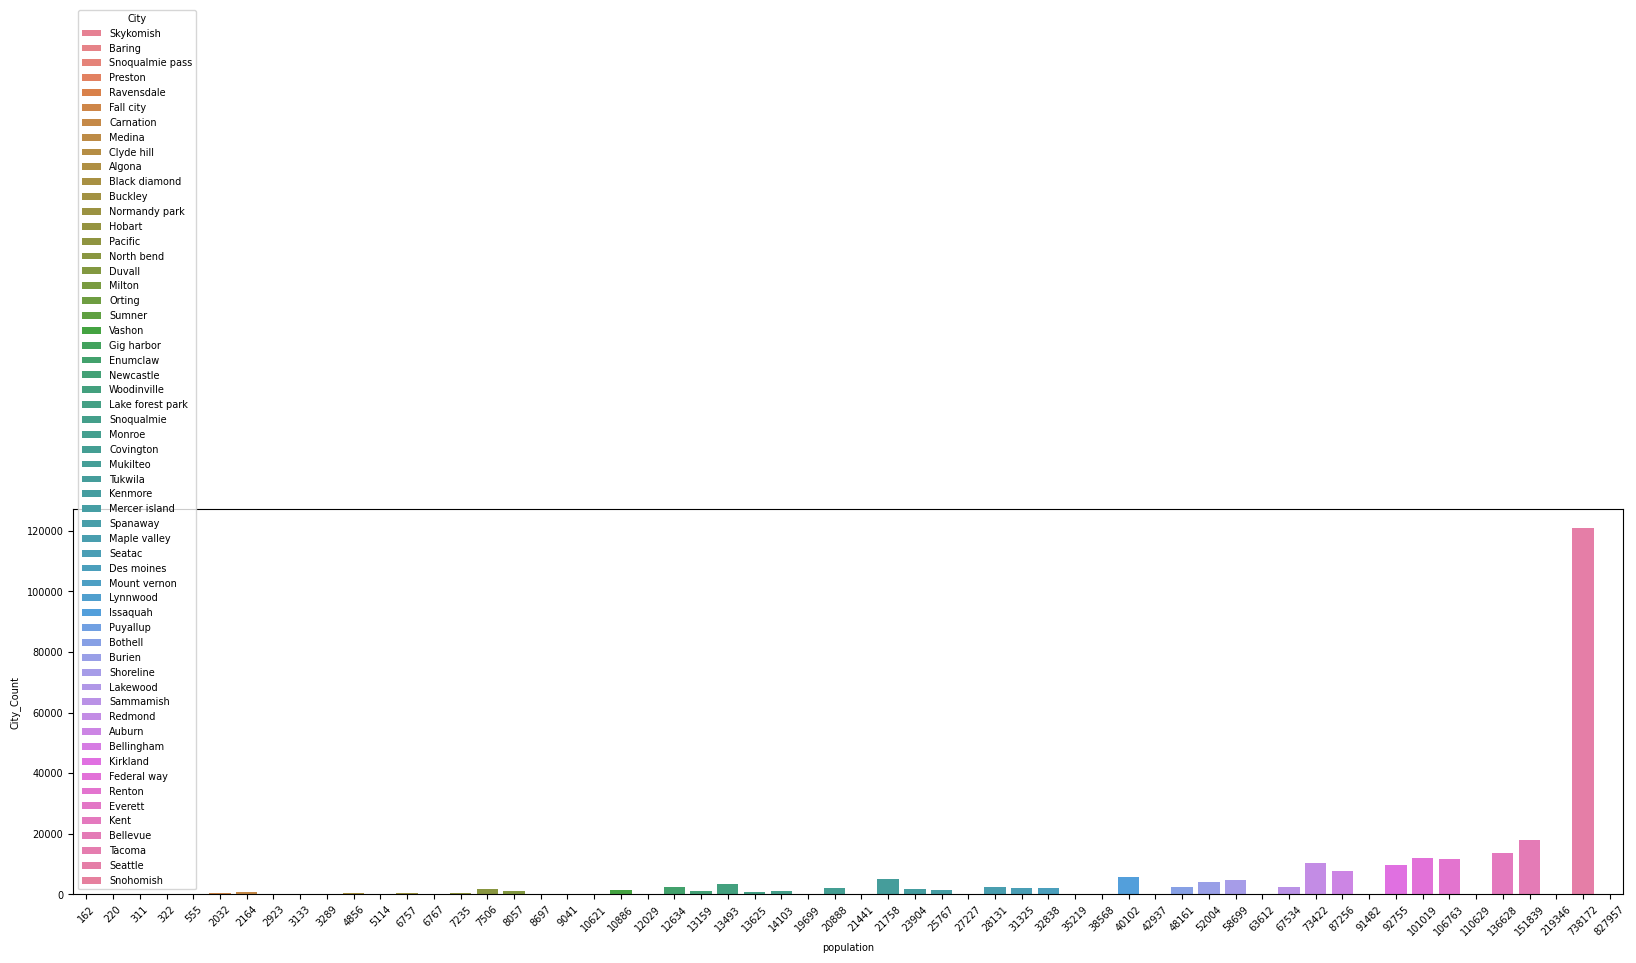

In [54]:
plt.figure(figsize=(20,5))

sns.barplot(data=merged_data, x="population", y="City_Count", hue="City", dodge=False)
plt.xticks(rotation=45)

plt.show()

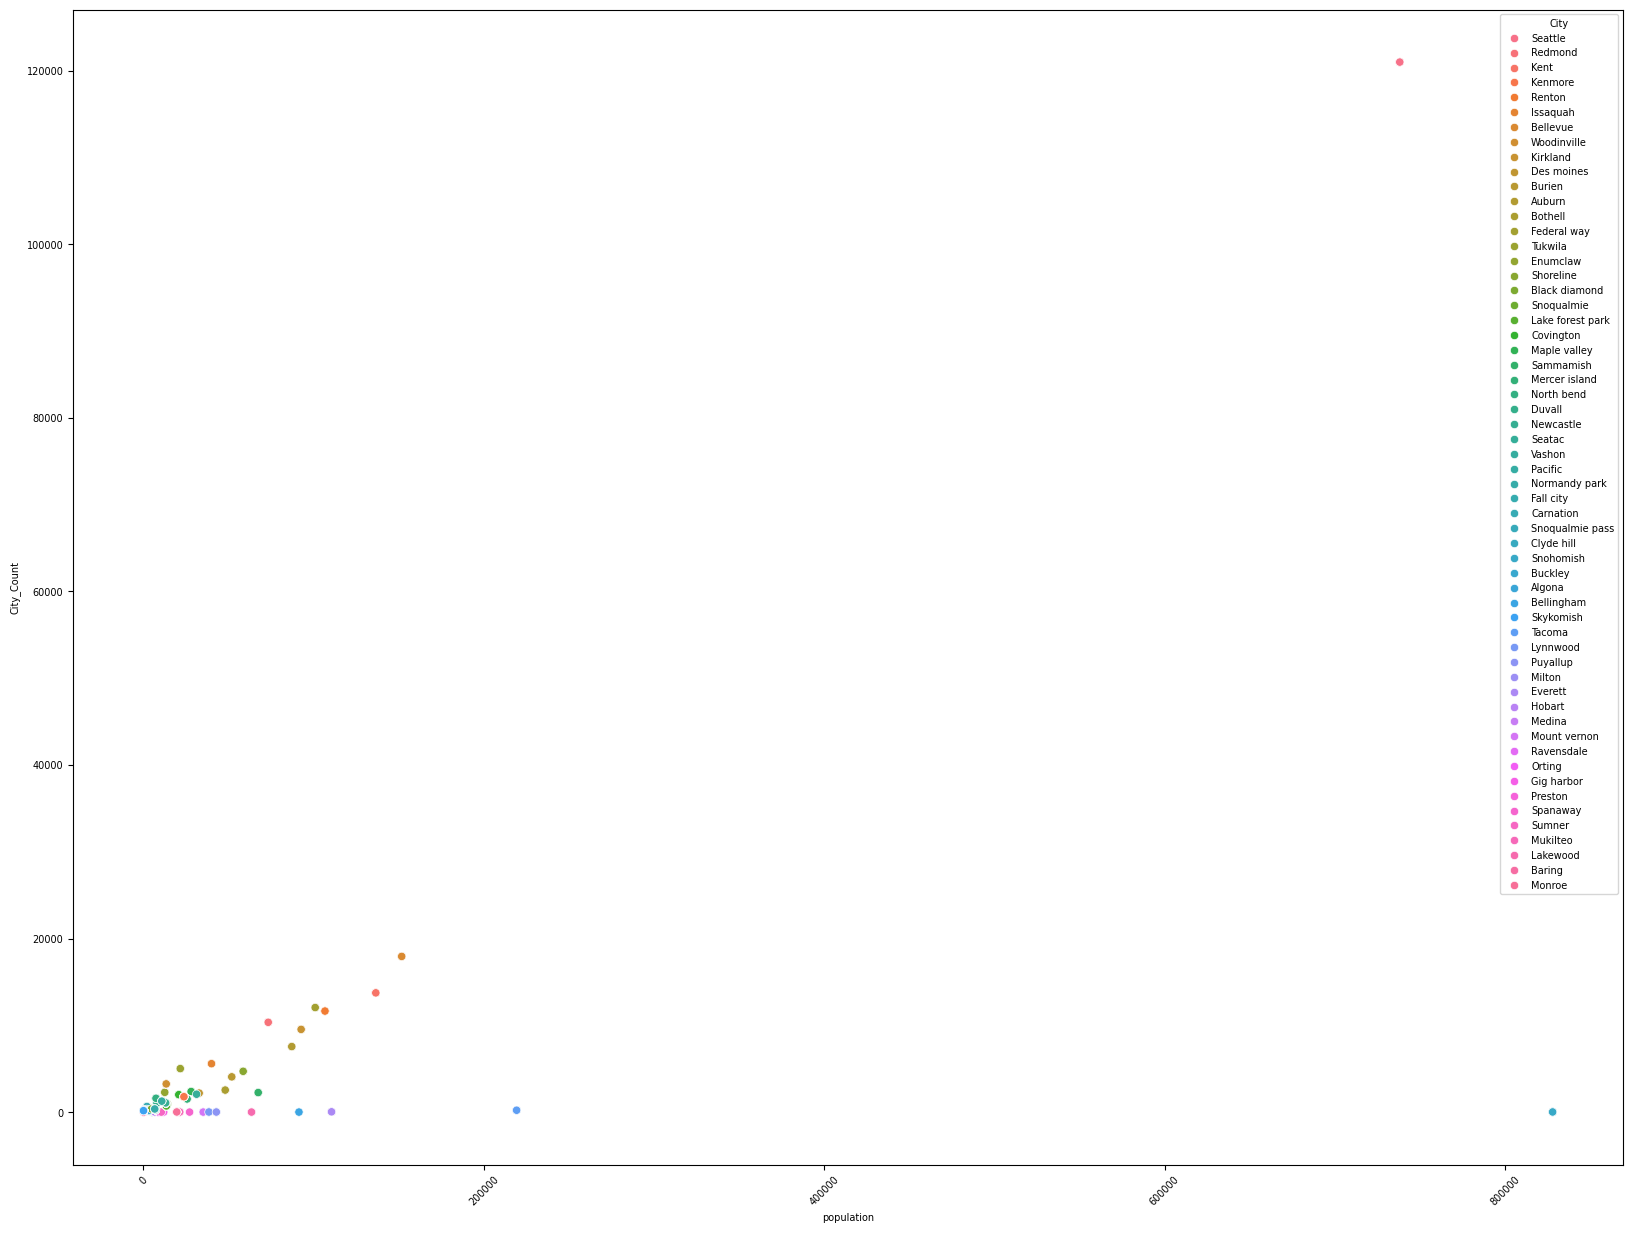

In [55]:
plt.figure(figsize=(20,15))

sns.scatterplot(data=merged_data, x="population", y="City_Count", hue="City")
plt.xticks(rotation=45)

plt.show()

In [56]:
# import plotly.express as px

# merged_data_filtered = merged_data.head(8000)

# fig = px.strip(merged_data, x='population', y='City_Count', color='City')
# fig.update_layout(
#         title='population, City_Count ', 
#         xaxis={
#             "showgrid": True, 
#             "rangeslider": {
#                 "visible": True, 
#                 "thickness": 0.08
#             }
#         }, 
#         yaxis={
#             "showgrid": True
#         }, 
#         legend={
#             "orientation": 'v'
#         }, 
#         paper_bgcolor='#FFFFFF'
#     )
# fig.show(renderer="iframe")

In [57]:
# most popular restaurant - Population

# import pandas as pd

# r_name = ["WENDY'S", 'MCDONALD', 'SUBWAY', 'DOMINO', 'BURGER KING']

# r_counts = merged_data[merged_data['Inspection Business Name'].isin(r_name)].groupby('City')['Inspection Business Name'].count().reset_index()

# r_counts_sorted = r_counts.sort_values(by='Inspection Business Name', ascending=False).reset_index(drop=True)

# max_cities = r_counts_sorted[r_counts_sorted['Inspection Business Name'] == r_counts_sorted['Inspection Business Name'].max()]

# print("number of fastfood:")
# r_counts_sorted




## total of each inspections per month 

reading Data

In [58]:
King_County = pd.read_csv('data/Food_Establishment_Inspection_Data.csv',low_memory=False)

functions

In [59]:

f = lambda x : str(x)
def get_month(date_string):
    
    month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month = date_string.split('/')
    return month_abbr[int(month[0])-1]
King_County['month'] = King_County['Inspection Date'].fillna(0).apply(f).apply(get_month)
King_County

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Grade,month
0,#807 TUTTA BELLA,#807 TUTTA BELLA,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,Unsatisfactory,False,RED,1300 - Food contact surfaces cleaned and sanit...,15,PR0089260,DAJ5DTHLV,IVBTPZO0B,1.0,Mar
1,#807 TUTTA BELLA,#807 TUTTA BELLA,03/02/2023,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,Unsatisfactory,False,RED,2120 - Proper cold holding temperatures ( 42 d...,5,PR0089260,DAJ5DTHLV,IV5GOME67,1.0,Mar
2,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,Unsatisfactory,False,BLUE,"3200 - Insects, rodents, animals not present; ...",5,PR0089260,DAEEWQC0L,IVQ7QYW2V,1.0,Aug
3,#807 TUTTA BELLA,#807 TUTTA BELLA,08/31/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,Unsatisfactory,False,RED,0200 - Food Worker Cards current for all food ...,5,PR0089260,DAEEWQC0L,IV0J437H6,1.0,Aug
4,#807 TUTTA BELLA,#807 TUTTA BELLA,01/13/2022,Seating 0-12 - Risk Category III,2746 NE 45TH ST,SEATTLE,98105,(206) 722-6400,-122.296415,47.662311,...,Satisfactory,False,NaN,NaN,0,PR0089260,DAWWGK08K,NaN,1.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255208,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,11/27/2017,Seating 0-12 - Risk Category III,11752 15TH AVE NE,SEATTLE,98125,(415) 385-1379,-122.312056,47.715359,...,Satisfactory,False,NaN,NaN,0,PR0086991,DA3OGNCPY,NaN,2.0,Nov
255209,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,ZYLBERSCHTEIN'S DELICATESSEN & BAKERY,09/06/2017,Seating 0-12 - Risk Category III,11752 15TH AVE NE,SEATTLE,98125,(415) 385-1379,-122.312056,47.715359,...,Complete,False,NaN,NaN,0,PR0086991,DALIX7JOT,NaN,2.0,Sep
255210,ZZ DESSERT,ZZ DESSERT,01/23/2023,Seating 0-12 - Risk Category III,18230 E VALLEY HWY STE 178,KENT,98032,(206) 779-0528,-122.220420,47.438930,...,Satisfactory,False,BLUE,"3400 - Wiping cloths properly used, stored, sa...",5,PR0089412,DAQZ5Q076,IVGU0QCRM,1.0,Jan
255211,ZZ DESSERT,ZZ DESSERT,01/23/2023,Seating 0-12 - Risk Category III,18230 E VALLEY HWY STE 178,KENT,98032,(206) 779-0528,-122.220420,47.438930,...,Satisfactory,False,BLUE,"4400 - Plumbing properly sized, installed,...",5,PR0089412,DAQZ5Q076,IV3MMPWH7,1.0,Jan


barplot

<Axes: xlabel='month'>

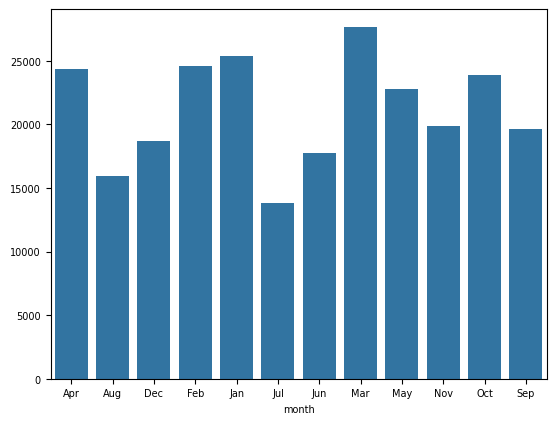

In [60]:


grouped = King_County.groupby('month')['Inspection Date'].count()
sns.barplot(x=grouped.index, y=grouped.values)



## 10 restaurant ptocess

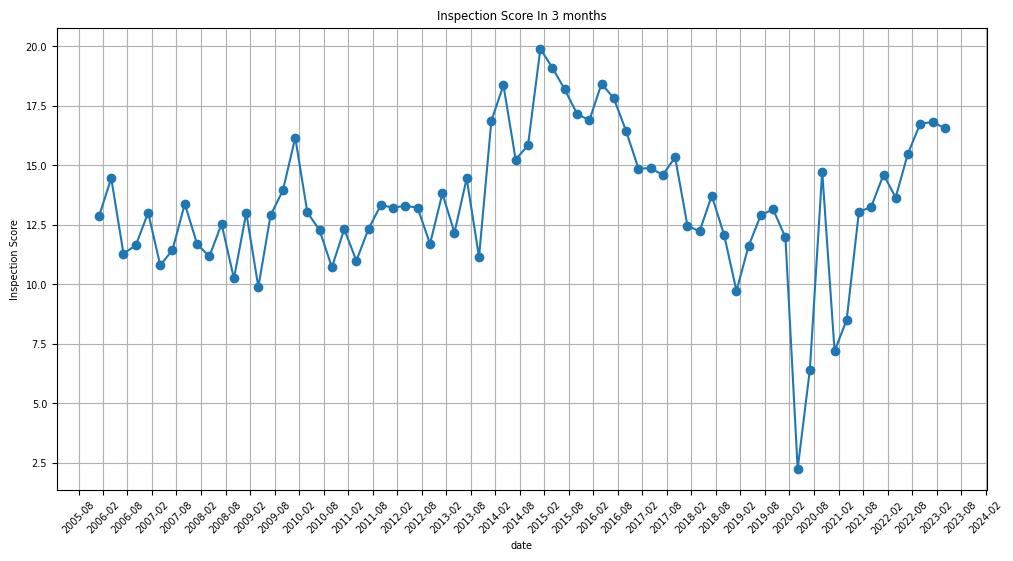

In [61]:
king_county_df['Inspection Date'] = pd.to_datetime(king_county_df['Inspection Date'])
king_county_df = king_county_df.sort_values(by='Inspection Date')
plt.figure(figsize=(12, 6))
start_date = king_county_df['Inspection Date'].min()
end_date = start_date + pd.DateOffset(months=3)
dates = []
scores = []
while end_date <= king_county_df['Inspection Date'].max():
    subset = king_county_df[(king_county_df['Inspection Date'] >= start_date) & (king_county_df['Inspection Date'] < end_date)]
    dates.append(start_date)
    scores.append(subset['Inspection Score'].mean())
    start_date = end_date
    end_date = start_date + pd.DateOffset(months=3)
plt.plot(dates, scores, marker='o', linestyle='-')
plt.title('Inspection Score In 3 months')
plt.xlabel('date')
plt.ylabel('Inspection Score')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


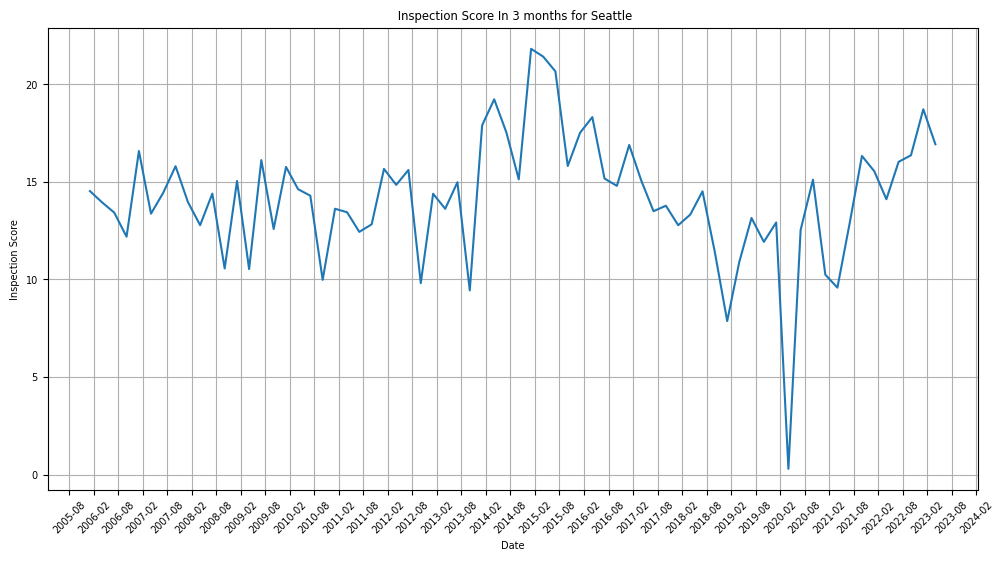

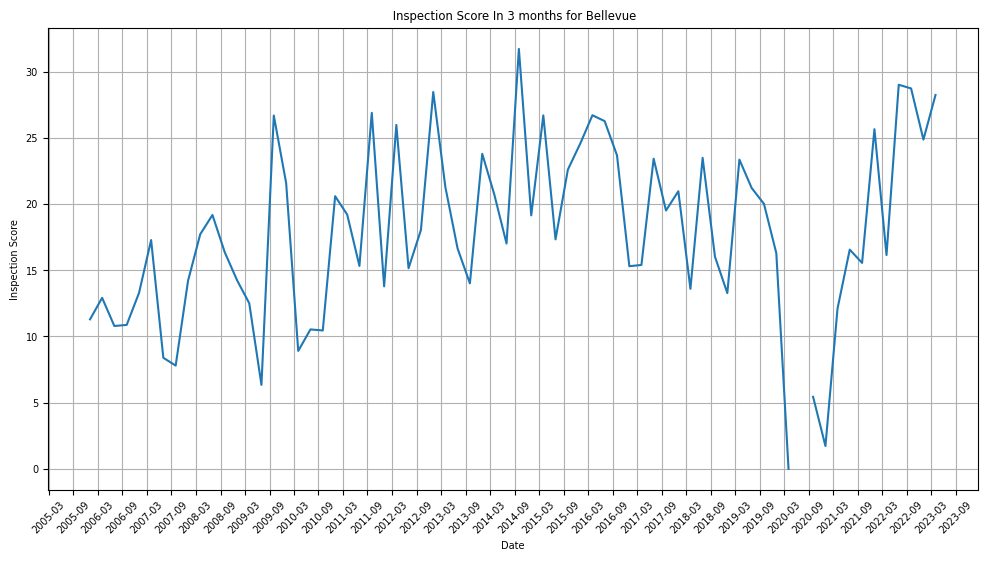

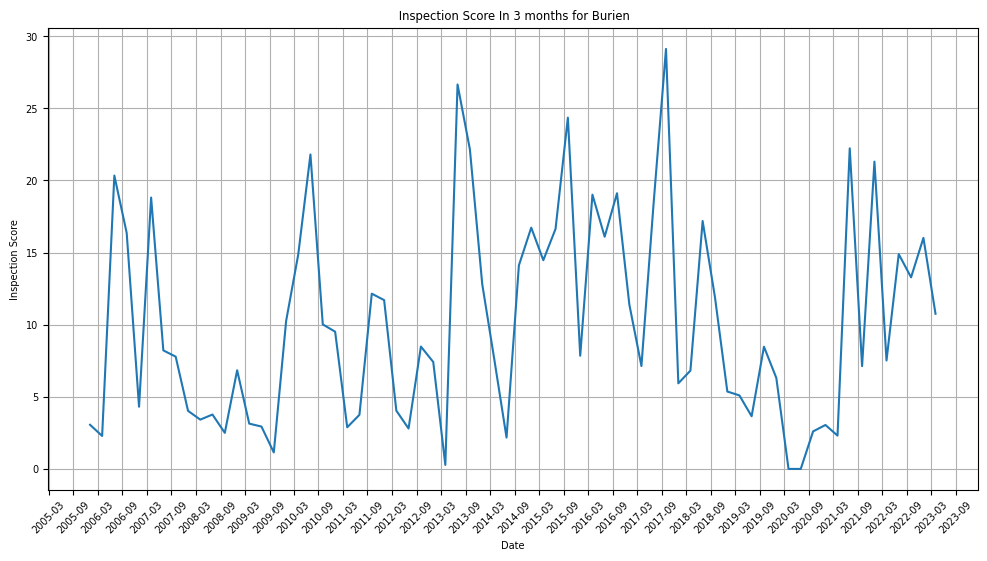

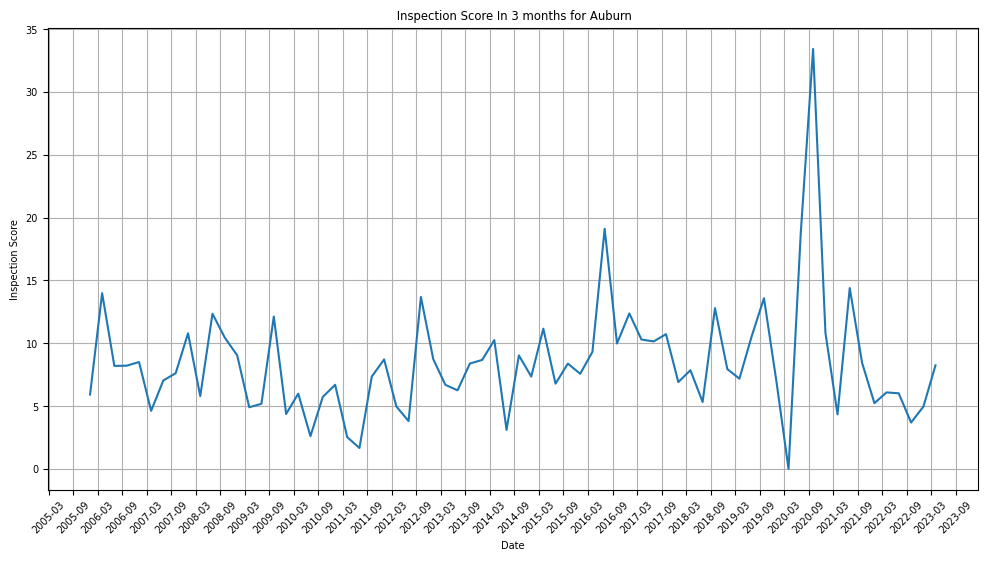

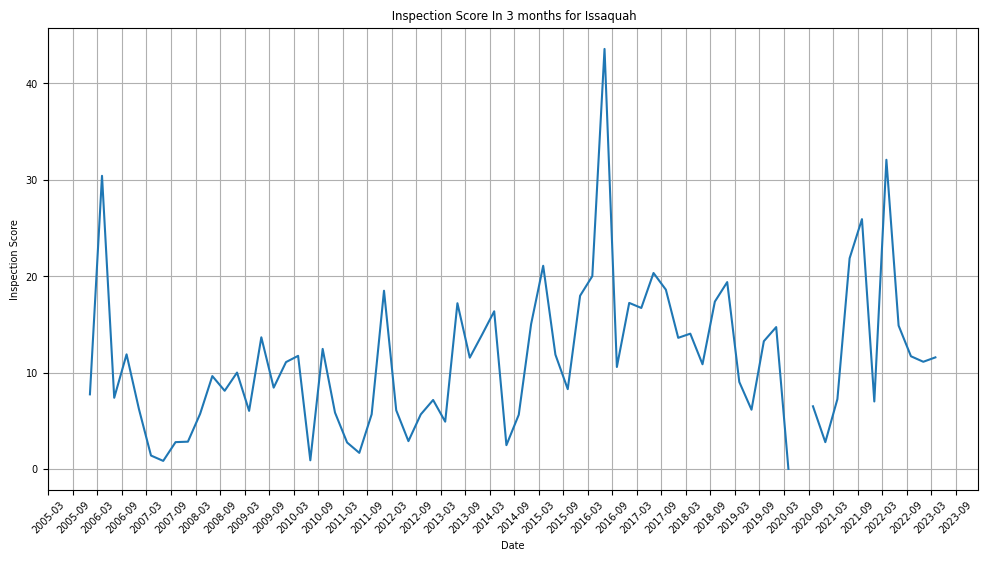

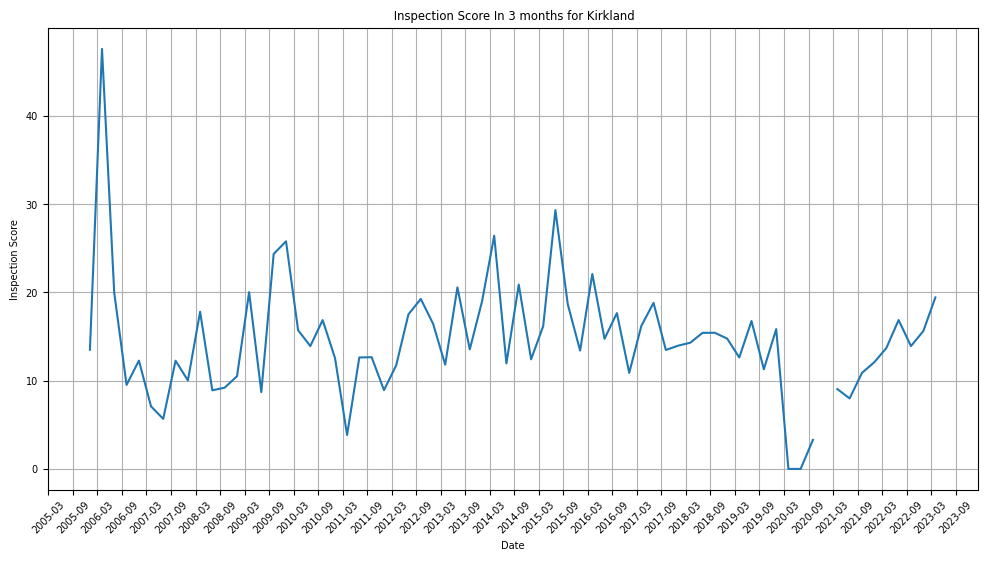

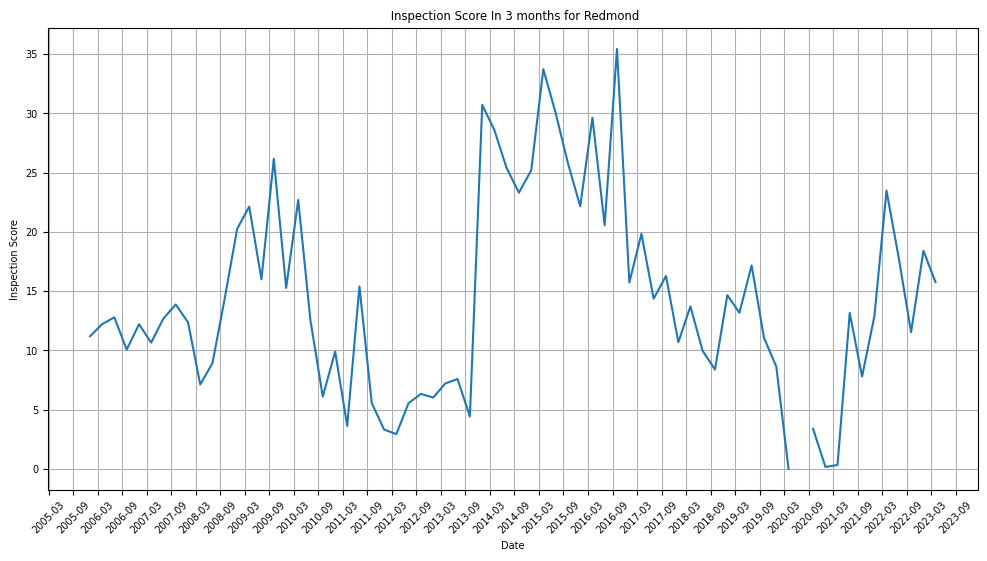

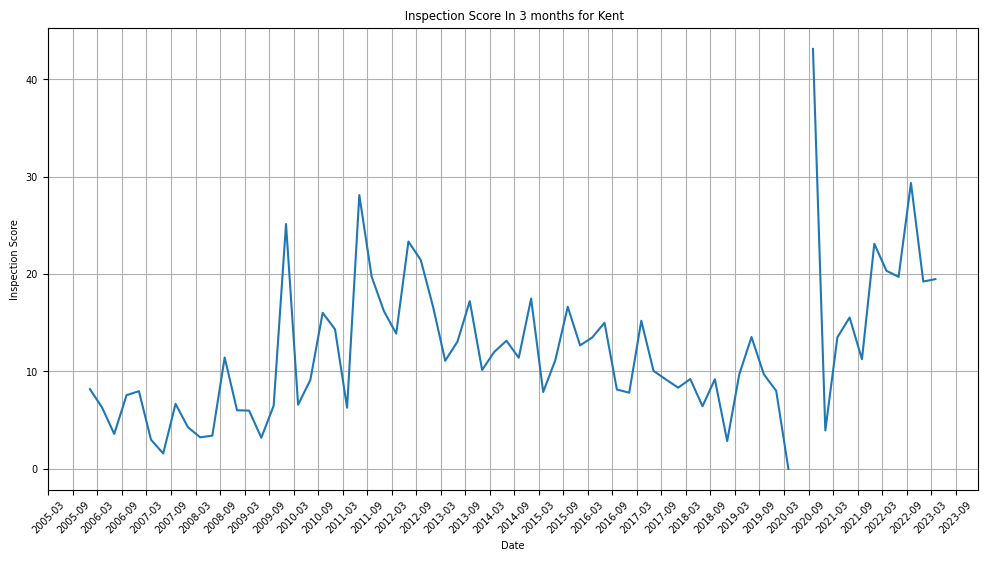

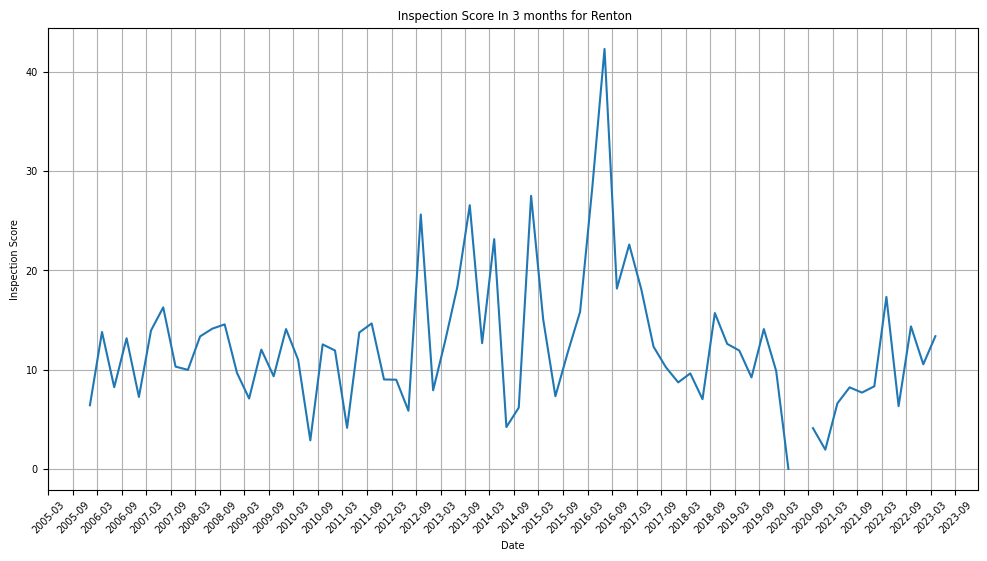

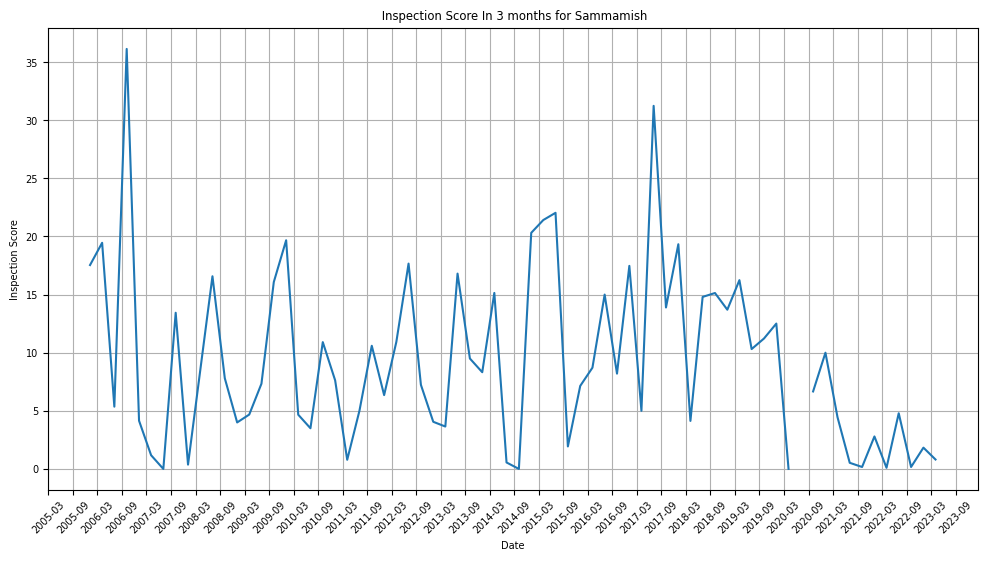

In [62]:
cities = king_county_df['City'].unique()[:10]
for city in cities:
    plt.figure(figsize=(12, 6))
    city_data = king_county_df[king_county_df['City'] == city]
    start_date = city_data['Inspection Date'].min()
    end_date = start_date + pd.DateOffset(months=3)
    dates = []
    scores = []

    while end_date <= city_data['Inspection Date'].max():
        subset = city_data[(city_data['Inspection Date'] >= start_date) & (city_data['Inspection Date'] < end_date)]
        dates.append(start_date)
        scores.append(subset['Inspection Score'].mean())

        start_date = end_date
        end_date = start_date + pd.DateOffset(months=3)
    plt.plot(dates, scores)
    plt.title(f' Inspection Score In 3 months for {city}')
    plt.xlabel('Date')
    plt.ylabel('Inspection Score')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()
